In [6]:
# For reading data set
# importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
emp=pd.read_csv("emp_data.csv")

In [10]:
emp.columns

Index(['Salary_hike', 'Churn_out_rate'], dtype='object')

(array([2., 1., 2., 1., 1., 1., 0., 1., 0., 1.]),
 array([1580., 1609., 1638., 1667., 1696., 1725., 1754., 1783., 1812.,
        1841., 1870.]),
 <a list of 10 Patch objects>)

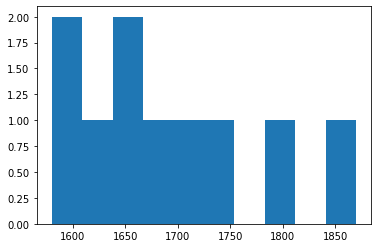

In [14]:
plt.hist(emp.Salary_hike)

(array([2., 1., 1., 2., 1., 0., 1., 1., 0., 1.]),
 array([60. , 63.2, 66.4, 69.6, 72.8, 76. , 79.2, 82.4, 85.6, 88.8, 92. ]),
 <a list of 10 Patch objects>)

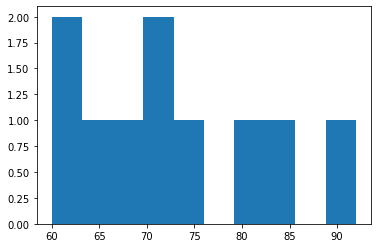

In [15]:
plt.hist(emp.Churn_out_rate)

{'whiskers': [<matplotlib.lines.Line2D at 0x17012613f88>,
 'caps': [<matplotlib.lines.Line2D at 0x17012619ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x17012613688>],
 'medians': [<matplotlib.lines.Line2D at 0x17012619c48>],
 'fliers': [<matplotlib.lines.Line2D at 0x17012620b08>],
 'means': []}

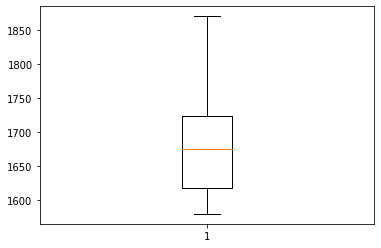

In [16]:
plt.boxplot(emp.Salary_hike)

{'whiskers': [<matplotlib.lines.Line2D at 0x17012680cc8>,
 'caps': [<matplotlib.lines.Line2D at 0x17012683c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x17012680148>],
 'medians': [<matplotlib.lines.Line2D at 0x17012688c08>],
 'fliers': [<matplotlib.lines.Line2D at 0x17012688d08>],
 'means': []}

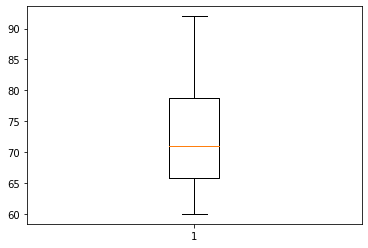

In [17]:
plt.boxplot(emp.Churn_out_rate)

Text(0, 0.5, 'Churn_out_rate')

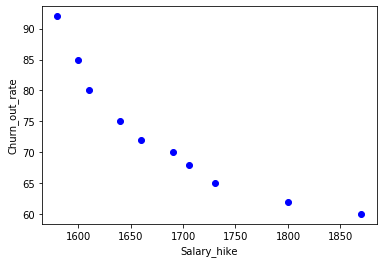

In [65]:
plt.plot(emp.Salary_hike,emp.Churn_out_rate,"bo");plt.xlabel("Salary_hike");plt.ylabel("Churn_out_rate")

In [20]:
emp.Salary_hike.corr(emp.Churn_out_rate) # Negaive correlation with each other 

-0.9117216186909112

In [3]:
emp.head()

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72


In [4]:
emp.tail()

,Salary_hike,Churn_out_rate
5,1690,70
6,1706,68
7,1730,65
8,1800,62
9,1870,60


In [21]:
# For preparing linear regression model we need to import the statsmodels.formula.api
import statsmodels.formula.api as smf
model=smf.ols("Churn_out_rate~Salary_hike",data=emp).fit()

In [22]:
# For getting coefficients of the varibles used in equation
model.params

Intercept      244.364911
Salary_hike     -0.101543
dtype: float64

In [23]:
# P-values for the variables and R-squared value for prepared model
model.summary()

C:\Users\anilkrishna\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Churn_out_rate   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     39.40
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           0.000239
Time:                        14:12:51   Log-Likelihood:                -28.046
No. Observations:                  10   AIC:                             60.09
Df Residuals:                       8   BIC:                             60.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     244.3649     27.352      8.934      0.000     181.291     307.439
Salary_hike    -0.1015      0.016     -6.277      0.000      -0.139      -0.064
==============================================================================
Omnibus:                        2.201   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.408
Skew:                           0.851   Prob(JB):                        0.495
Kurtosis:                       2.304   Cond. No.                     3.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
print (model.conf_int(0.05)) # 95% confidence interval

                      0           1
Intercept    181.291232  307.438591
Salary_hike   -0.138845   -0.064240


In [30]:
pred = model.predict(emp.iloc[:,0]) # Predicted values of Salary_hike  using the model

Text(0, 0.5, 'Salary_hike')

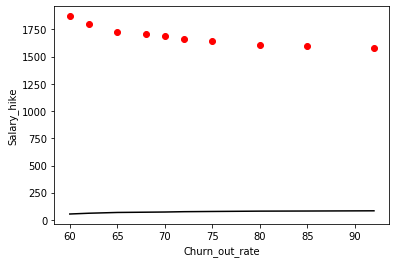

In [31]:
# Visualization of regresion line over the scatter plot of Churn_out_rate and Salary_hike
# For visualization we need to import matplotlib.pyplot
import matplotlib.pylab as plt
plt.scatter(x=emp['Churn_out_rate'],y=emp['Salary_hike'],color='red');plt.plot(emp['Churn_out_rate'],pred,color='black');plt.xlabel('Churn_out_rate');plt.ylabel('Salary_hike')


In [32]:
pred.corr(emp.Salary_hike) # -1.0

-1.0

In [34]:
# Transforming variables for accuracy
model2 = smf.ols('Churn_out_rate~np.log(Salary_hike)',data=emp).fit()
model2.params
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Churn_out_rate   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     44.85
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           0.000153
Time:                        14:36:16   Log-Likelihood:                -27.502
No. Observations:                  10   AIC:                             59.00
Df Residuals:                       8   BIC:                             59.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1381.4562    195.402      7.070      0.000     930.858    1832.054
np.log(Salary_hike)  -176.1097     26.297     -6.697      0.000    -236.751    -115.468
==============================================================================
Omnibus:                        2.213   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.418
Skew:                           0.853   Prob(JB):                        0.492
Kurtosis:                       2.298   Cond. No.                     1.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
print(model2.conf_int(0.01)) # 99% confidence level


                              0            1
Intercept            725.806856  2037.105529
np.log(Salary_hike) -264.347078   -87.872392


In [37]:
pred2 = model2.predict(pd.DataFrame(emp['Salary_hike']))
pred2.corr(emp.Churn_out_rate)
# pred2 = model2.predict(wcat.iloc[:,0])
pred2

0    84.376270
1    82.161024
2    81.063764
3    77.812415
4    75.677725
5    72.523437
6    70.863969
7    68.403723
8    61.418285
9    54.699388
dtype: float64

Text(0, 0.5, 'Churn_out_rate')

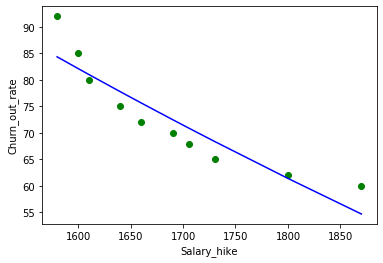

In [39]:
plt.scatter(x=emp['Salary_hike'],y=emp['Churn_out_rate'],color='green');plt.plot(emp['Salary_hike'],pred2,color='blue');plt.xlabel('Salary_hike');plt.ylabel('Churn_out_rate')


# Exponential Transform 

In [40]:
# Exponential transformation
model3 = smf.ols('np.log(Churn_out_rate)~Salary_hike',data=emp).fit()
model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(Churn_out_rate)   R-squared:                       0.874
Model:                                OLS   Adj. R-squared:                  0.858
Method:                     Least Squares   F-statistic:                     55.26
Date:                    Sun, 05 Apr 2020   Prob (F-statistic):           7.38e-05
Time:                            14:45:13   Log-Likelihood:                 16.511
No. Observations:                      10   AIC:                            -29.02
Df Residuals:                           8   BIC:                            -28.42
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.6383      0.318     20.902      0.000       5.906       7.371
Salary_hike    -0.0014      0.000     -7.434      0.000      -0.002      -0.001
==============================================================================
Omnibus:                        1.935   Durbin-Watson:                   0.585
Prob(Omnibus):                  0.380   Jarque-Bera (JB):                1.314
Skew:                           0.780   Prob(JB):                        0.519
Kurtosis:                       2.152   Cond. No.                     3.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
print(model3.conf_int(0.01)) # 99% confidence level


                    0         1
Intercept    5.572635  7.703965
Salary_hike -0.002027 -0.000766


In [42]:
pred_log = model3.predict(pd.DataFrame(emp['Salary_hike']))
pred_log


0    4.432091
1    4.404164
2    4.390201
3    4.348311
4    4.320384
5    4.278494
6    4.256153
7    4.222641
8    4.124897
9    4.027154
dtype: float64

In [43]:
pred3=np.exp(pred_log)  # as we have used log(churn_out_rate) in preparing model so we need to convert it back
pred3
pred3.corr(emp.Churn_out_rate)

0.9334219364827092

Text(0, 0.5, 'Churn_out_rate')

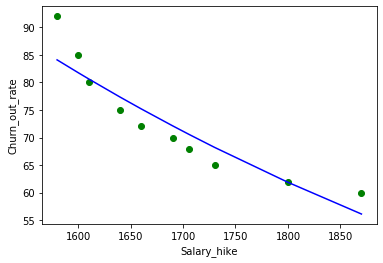

In [45]:
plt.scatter(x=emp['Salary_hike'],y=emp['Churn_out_rate'],color='green');plt.plot(emp.Salary_hike,pred3,color='blue');plt.xlabel('Salary_hike');plt.ylabel('Churn_out_rate')


# so we will consider the model having highest R-Squared value which is the log transformation - model3
# getting residuals of the entire data set

In [46]:
student_resid = model3.resid_pearson 
student_resid


array([ 1.72840047,  0.74161333, -0.15751152, -0.59392927, -0.84241119,
       -0.57805397, -0.70612046, -0.92980489,  0.04310705,  1.29471045])

Text(0, 0.5, 'Standardized Residual')

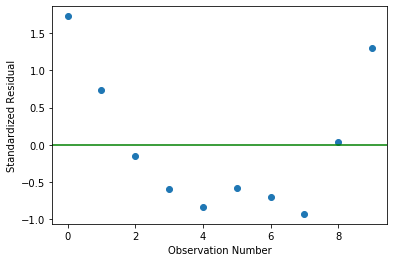

In [47]:
plt.plot(model3.resid_pearson,'o');plt.axhline(y=0,color='green');plt.xlabel("Observation Number");plt.ylabel("Standardized Residual")


Text(0, 0.5, 'Actual')

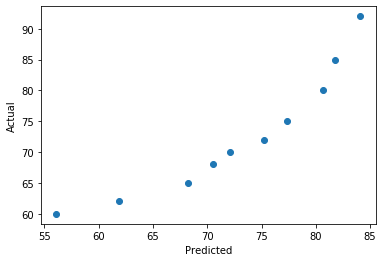

In [49]:
# Predicted vs actual values
plt.scatter(x=pred3,y=emp.Churn_out_rate);plt.xlabel("Predicted");plt.ylabel("Actual")

# # Quadratic model

In [54]:
# Quadratic model
emp["Salary_hike_Sq"] = emp.Salary_hike*emp.Salary_hike


In [55]:
model_quad = smf.ols("np.log(Churn_out_rate)~Salary_hike+Salary_hike_Sq",data=emp).fit()
model_quad.params


Intercept         23.176235
Salary_hike       -0.020680
Salary_hike_Sq     0.000006
dtype: float64

In [56]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(Churn_out_rate)   R-squared:                       0.984
Model:                                OLS   Adj. R-squared:                  0.979
Method:                     Least Squares   F-statistic:                     210.1
Date:                    Sun, 05 Apr 2020   Prob (F-statistic):           5.63e-07
Time:                            15:22:47   Log-Likelihood:                 26.728
No. Observations:                      10   AIC:                            -47.46
Df Residuals:                           7   BIC:                            -46.55
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         23.1762      2.415      9.597      0.000      17.466      28.887
Salary_hike       -0.0207      0.003     -7.351      0.000      -0.027      -0.014
Salary_hike_Sq  5.605e-06   8.17e-07      6.857      0.000    3.67e-06    7.54e-06
==============================================================================
Omnibus:                        0.520   Durbin-Watson:                   1.272
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.506
Skew:                          -0.088   Prob(JB):                        0.777
Kurtosis:                       1.913   Cond. No.                     1.10e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
pred_quad = model_quad.predict(emp)

In [59]:
model_quad.conf_int(0.05) 

,0,1
Intercept,17.465629,28.886840
Salary_hike,-0.027333,-0.014028
Salary_hike_Sq,0.000004,0.000008


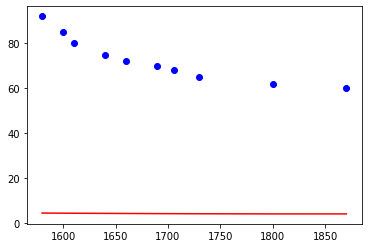

In [60]:
plt.scatter(emp.Salary_hike,emp.Churn_out_rate,c="b");plt.plot(emp.Salary_hike,pred_quad,"r")

(array([1., 1., 1., 1., 1., 0., 2., 2., 0., 1.]),
 array([-1.39581013e+00, -1.11662435e+00, -8.37438557e-01, -5.58252769e-01,
        -2.79066981e-01,  1.18806762e-04,  2.79304595e-01,  5.58490383e-01,
         8.37676171e-01,  1.11686196e+00,  1.39604775e+00]),
 <a list of 10 Patch objects>)

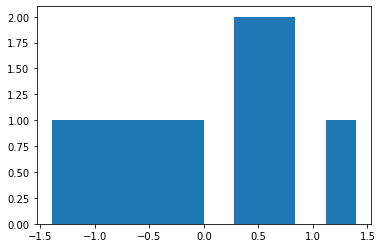

In [64]:
plt.hist(model_quad.resid_pearson) # histogram for residual values 

# Conclusion: statistically Proved That Salary Hike (sh) Increases ,Decrease The Chur out rate(cor)
#  my model3 gave me 87% Accuracy and Also p value very low 